# Note: The the candidate of the tuning is not included in the running code, rather, they are commented and placed in each model for reference.

# **1. Split data into training, validation, test dataset**

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support vector classifier"
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import random
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier


In [ ]:
def train_validation_test_split(dataset,t_size,validation_size):

  '''
    split dataset into training/validation and test dataset

    args: dataset, np array or matrices
          test_size, float between 0~1
          validation_size, float between 0~1
    output: training dataset, testing dataset, validation dataset, np array
  ''' 
  
  training_validation_data, testing_data = train_test_split(dataset,test_size=t_size, random_state=25)
  training_data, validation_data = train_test_split(training_validation_data,test_size=validation_size, random_state=34)

  y_train = training_data['Severity']
  x_train = training_data.drop('Severity', axis=1)

  y_test = testing_data['Severity']
  x_test = testing_data.drop('Severity', axis=1)

  y_validation = validation_data['Severity']
  x_validation = validation_data.drop('Severity', axis=1)

  return y_train,x_train,y_test, x_test,y_validation,x_validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import dataset
path = '/content/drive/Shareddrives/CIS520 Final Project/Notebook/Dataset/binary_dataset_noYear.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset = dataset.sample(10000)
y_train,x_train,y_test, x_test,y_val,x_val = train_validation_test_split(dataset,0.3,0.01)

In [ ]:
print(dataset.shape)

(10000, 41)


In [ ]:
# convert dataframe to numpy array
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()
y_val = y_val.to_numpy()
x_val = x_val.to_numpy()

In [ ]:
dataset.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side_0,Side_1,State_0,State_1,State_2,State_3,State_4,State_5,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction_0,Wind_Direction_1,Wind_Direction_2,Wind_Direction_3,Wind_Direction_4,Wind_Speed(mph),Precipitation(in),Weather_Condition_0,Weather_Condition_1,Weather_Condition_2,Weather_Condition_3,Weather_Condition_4,Weather_Condition_5,Weather_Condition_6,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset_0,Sunrise_Sunset_1,month,dayofweek
52087,1,0.749543,0.812692,0.007822,0,1,0,1,0,0,1,1,0.602740,0.806122,0.246525,0.09946,0,1,1,1,0,0.010598,0.000000,0,0,0,0,0,0,1,False,False,True,False,False,False,False,0,1,0.454545,1.000000
8516,0,0.316720,0.239491,0.000000,0,1,0,0,0,0,1,1,0.678082,0.234694,0.201678,0.09946,0,0,0,0,1,0.006359,0.000000,0,0,0,0,0,0,1,False,False,False,False,False,False,False,1,0,0.181818,0.666667
43970,0,0.389242,0.122341,0.000000,0,1,0,0,0,1,0,0,0.657534,0.673469,0.237870,0.09946,1,0,0,0,0,0.012717,0.000000,0,0,0,0,1,0,0,False,False,False,False,False,False,False,1,0,0.727273,0.333333
19798,0,0.363850,0.221141,0.000000,0,1,0,0,0,0,1,1,0.753425,0.061224,0.230265,0.09946,0,1,1,1,0,0.019076,0.000000,0,0,0,0,0,0,1,False,False,False,False,False,False,False,1,0,0.272727,0.333333
78486,1,0.744321,0.629082,0.006412,1,0,0,1,1,0,0,1,0.516438,0.561224,0.264097,0.09946,0,1,1,1,1,0.031793,0.005227,0,0,0,0,0,1,1,False,False,False,False,False,False,False,1,0,0.818182,0.500000


In [ ]:
def plotROC(model,x_test,y_test,model_name):
  '''
  https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
  '''
  probs = model.predict_proba(x_test)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = auc(fpr, tpr)

  title = 'Receiver Operating Characteristic - '+ model_name
  plt.title(title)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  #plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return fpr, tpr, roc_auc

def preision_recall_f1(y_true,y_pred):
  print('Precision:',precision_score(y_true,y_pred))
  print('Recall:',recall_score(y_true,y_pred))
  print('F1',f1_score(y_true,y_pred))
  return f1_score(y_true,y_pred)

In [ ]:
fpr_list=[]
tpr_list=[]
auc_list=[]
f1_list=[]

# **2. Train a Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
NB_model = GaussianNB().fit(x_train,y_train)

the training score using optimal hyperparameters:  0.5663780663780664
the test score using optimal hyperparameters:  0.5556666666666666


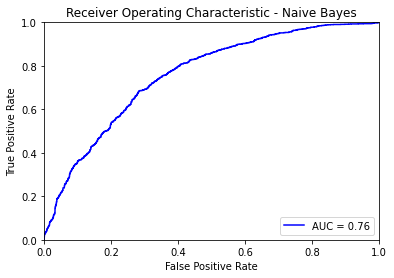

Precision: 0.8245033112582781
Recall: 0.16285153695225638
F1 0.2719825232113599


In [ ]:
print('the training score using optimal hyperparameters: ',NB_model.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',NB_model.score(x_test,y_test))
y_pred = NB_model.predict(x_test)

fpr, tpr, roc_auc=plotROC(NB_model,x_test,y_test,'Naive Bayes')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

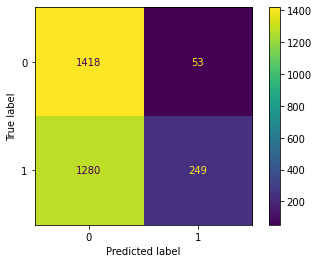

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, NB_model.predict(x_test))

# **3. Train a Logistic Regression Model**




In [ ]:
LR_model = LogisticRegression(penalty='l2',max_iter=1000).fit(x_train, y_train) # the type of penalty could be optimized
LR_trianing_accuracy = LR_model.score(x_train, y_train)
LR_test_accuracy = LR_model.score(x_test, y_test)


LR_trianing_accuracy: 0.7414141414141414
LR_test_accuracy: 0.7346666666666667


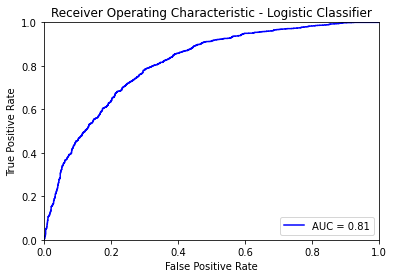

Precision: 0.7468013468013468
Recall: 0.7253106605624591
F1 0.7358991373589914


In [ ]:
print('LR_trianing_accuracy:',LR_trianing_accuracy)
print('LR_test_accuracy:',LR_test_accuracy)
y_pred = LR_model.predict(x_test)

fpr, tpr, roc_auc=plotROC(LR_model,x_test,y_test,'Logistic Classifier')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **4. Train a SVM model**

In [ ]:
SVM_model = SVC(probability = True)
########parameter tuning#################
'''
Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data.
parameters to be optimized:
  kernel: linear, poly, rbf, sigmoid
  C(C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: 
  decreasing C corresponds to more regularization.): 0.2,0.4,0.6,0.8,1
'''
# svm_params = {"kernel": ['linear', 'poly','rbf','sigmoid'],"C": [0.2,0.4,0.6,0.8,1]}
svm_params = {"kernel": ['poly'],"C": [0.8]}
svm_grid= GridSearchCV(SVM_model, svm_params,verbose=0)
svm_grid.fit(x_train,y_train)
print('the best parameter combination: ', svm_grid.best_params_)
########parameter tuning#################

the best parameter combination:  {'C': 0.8, 'kernel': 'poly'}


the training score using optimal hyperparameters:  0.8088023088023089
the test score using optimal hyperparameters:  0.7566666666666667


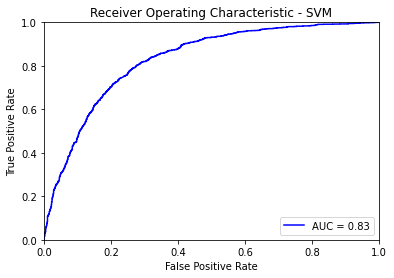

Precision: 0.7636963696369637
Recall: 0.7567037279267496
F1 0.7601839684625493


In [ ]:
print('the training score using optimal hyperparameters: ',svm_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',svm_grid.score(x_test,y_test))
y_pred = svm_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(svm_grid,x_test,y_test,'SVM')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **5. Train a Decision Tree model**

In [ ]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()

########parameter optimization#################
'''
parameters to be optimized:
  criterion:
  max_depth:
  splitter:
'''

DT_params = {"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30],"splitter":['best', 'random']}
DT_grid= GridSearchCV(DT_model, DT_params,verbose=0)
DT_grid.fit(x_train,y_train)

########parameter optimization#################


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 30],
                         'splitter': ['best', 'random']})

In [ ]:
print(DT_grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


the training score using optimal hyperparameters:  0.7886002886002886
the test score using optimal hyperparameters:  0.7713333333333333


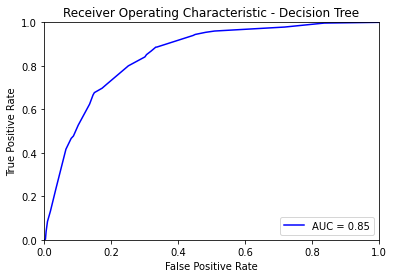

Precision: 0.7437825332562175
Recall: 0.8410725964682799
F1 0.7894413750767342


In [ ]:
print('the training score using optimal hyperparameters: ',DT_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',DT_grid.score(x_test,y_test))

y_pred = DT_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(DT_grid,x_test,y_test,'Decision Tree')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **6. Train a Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

########parameter optimization#################
'''
parameters to be optimized:
  n_estimators
  max_depth

RF_params = {'n_estimators':[300, 400, 500, 600],
             'max_depth':[10, 20, 30,40,50], 
             'random_state':[42]}
'''

random.seed(42)
RF_params = {'n_estimators':[500],'max_depth':[10], 'random_state':[42]}
RF_grid= GridSearchCV(RF_model, RF_params,verbose=0)
RF_grid.fit(x_train,y_train)

print('the best parameter combination: ', RF_grid.best_params_)

the best parameter combination:  {'max_depth': 10, 'n_estimators': 500, 'random_state': 42}


the training score using optimal hyperparameters:  0.8994227994227995
the test score using optimal hyperparameters:  0.809


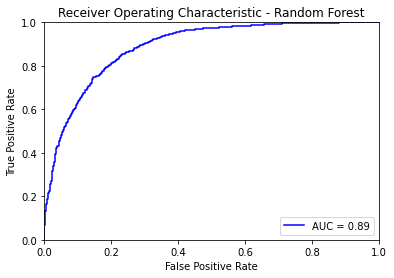

Precision: 0.7855436081242533
Recall: 0.8600392413342054
F1 0.8211052138620043


In [ ]:
print('the training score using optimal hyperparameters: ',RF_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',RF_grid.score(x_test,y_test))
y_pred = RF_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(RF_grid,x_test,y_test,'Random Forest')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **7. Neural Network, MLP Classifier**

In [ ]:
'''
MLP_model_para = {'alpha': [0.01, 0.001],
           'hidden_layer_sizes': [(100,), (50,50), (100,100)],
           'solver': ["adam", "sgd"],
           'activation': ["logistic", "relu"]}
'''
MLP_model_para = {'alpha': [0.01],
           'hidden_layer_sizes': [(50,50)],
           'solver': ["adam"],
           'activation': ["logistic"]}

model = MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,50), max_iter=1000, activation="logistic", solver='adam')
MLP_grid = model.fit(x_train, y_train)

the training score using optimal hyperparameters:  0.7834054834054834
the test score using optimal hyperparameters:  0.768


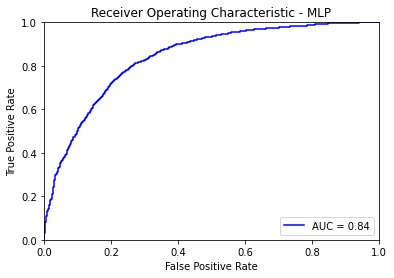

Precision: 0.762776025236593
Recall: 0.7907128842380641
F1 0.7764932562620424


In [ ]:
print('the training score using optimal hyperparameters: ', MLP_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ', MLP_grid.score(x_test,y_test))
y_pred = MLP_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(MLP_grid,x_test,y_test,'MLP')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **8. XGboost Model**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
'''
Tree booster:
eta: learning rate [0,1]
max_depth
learning task parameter:
objective: multi:softmax
num_class = 
'''
# parameters = {
#     'max_depth': [1,5,10],
#     'n_estimators': [50,100,150,200,250],
#     'learning_rate': [0.1, 0.01, 0.05]
# }

parameters = {
    'max_depth': [5],
    'n_estimators': [250],
    'learning_rate': [0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
XGB_grid = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    verbose=0
)
XGB_grid.fit(x_train,y_train)
print('the best parameter combination: ', XGB_grid.best_params_)
print('the validation score using optimal hyperparameters: ',XGB_grid.score(x_val,y_val))


the best parameter combination:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
the validation score using optimal hyperparameters:  0.8285714285714286


the training score using optimal hyperparameters:  0.8786435786435787
the test score using optimal hyperparameters:  0.812


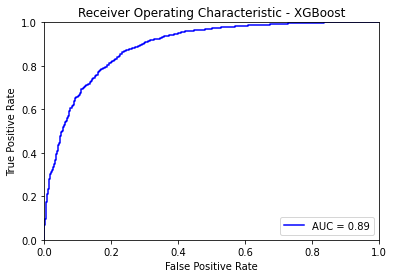

Precision: 0.7961939840392879
Recall: 0.8482668410725964
F1 0.8214059531348955


In [ ]:
print('the training score using optimal hyperparameters: ',XGB_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',XGB_grid.score(x_test,y_test))
y_pred = XGB_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(XGB_grid,x_test,y_test,'XGBoost')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **9. AdaBoost Model**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

########parameter optimization#################
'''
parameters to be optimized:
  base_estimator: The base estimator from which the boosted ensemble is built. 
  n_estimators: The maximum number of estimators at which boosting is terminated.
  learning_rate: Weight applied to each classifier at each boosting iteration. 
                A higher learning rate increases the contribution of each classifier. 
  
'''
# ada_params = {'n_estimators':[10,50,100,200],'learning_rate':[0.1,0.3,0.5,0.7,1]}
ada_params = {'n_estimators':[200],'learning_rate':[0.7]}
ada_grid= GridSearchCV(ada_model, ada_params,verbose=0)
ada_grid.fit(x_train,y_train)

print('the best parameter combination: ', ada_grid.best_params_)
########parameter optimization#################

the best parameter combination:  {'learning_rate': 0.7, 'n_estimators': 200}


the training score using optimal hyperparameters:  0.7868686868686868
the test score using optimal hyperparameters:  0.7716666666666666


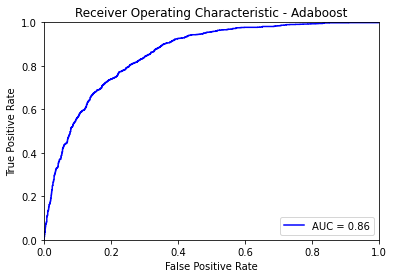

Precision: 0.7750977835723598
Recall: 0.7776324395029431
F1 0.7763630427685275


In [ ]:
print('the training score using optimal hyperparameters: ',ada_grid.score(x_train,y_train))
print('the test score using optimal hyperparameters: ',ada_grid.score(x_test,y_test))
y_pred = ada_grid.predict(x_test)

fpr, tpr, roc_auc=plotROC(ada_grid,x_test,y_test, 'Adaboost')
f1 = preision_recall_f1(y_test,y_pred)
fpr_list.append(fpr) 
tpr_list.append(tpr)
auc_list.append(roc_auc)
f1_list.append(f1)

# **10. Result Visualization**

In [ ]:
print(auc_list)

[0.7586386733885866, 0.8098213598949652, 0.8298303943829674, 0.848705004848479, 0.8882635687383594, 0.839668071488054, 0.8906626876979351, 0.8571432699955849]


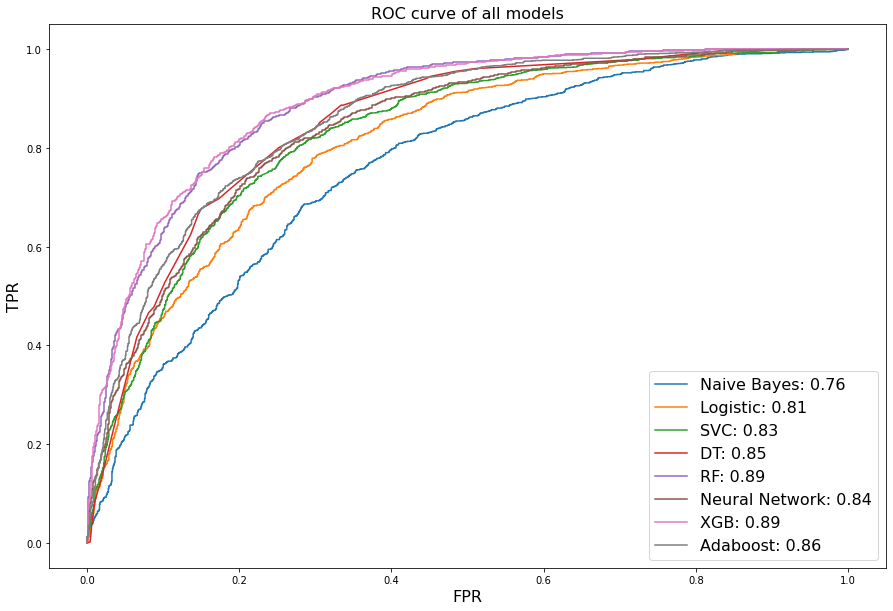

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


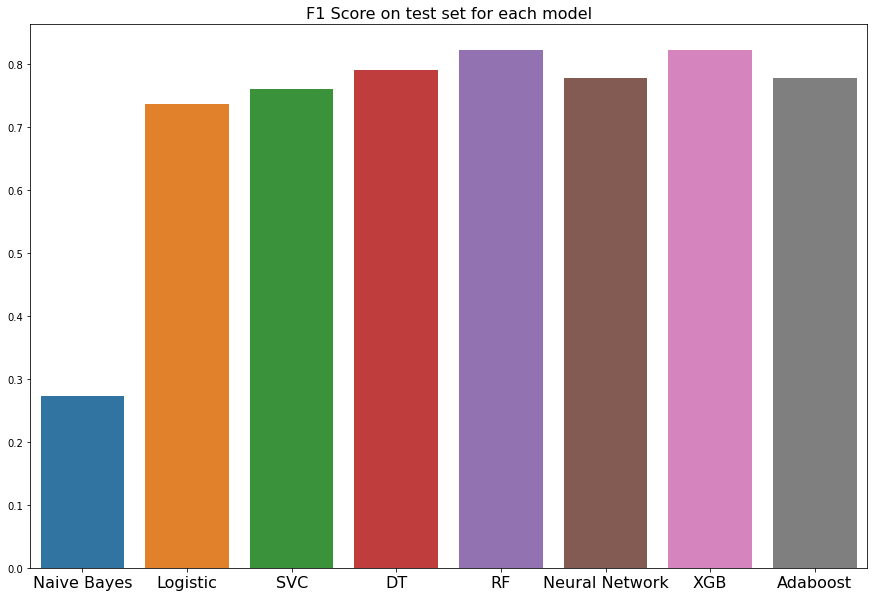

In [ ]:
model_name = ['Naive Bayes','Logistic','SVC','DT','RF','Neural Network','XGB','Adaboost']
plt.figure(figsize=(15,10))
for i in range(len(tpr_list)):
  plt.plot(fpr_list[i],tpr_list[i],label=model_name[i]+": "+round(auc_list[i],2).astype(str))
plt.title('ROC curve of all models',fontsize=16)
plt.xlabel('FPR',fontsize=16)
plt.ylabel('TPR',fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title("F1 Score on test set for each model",fontsize=16)
sns.barplot(list(range(len(f1_list))), f1_list)
plt.xticks(range(len(f1_list)), labels=model_name, fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


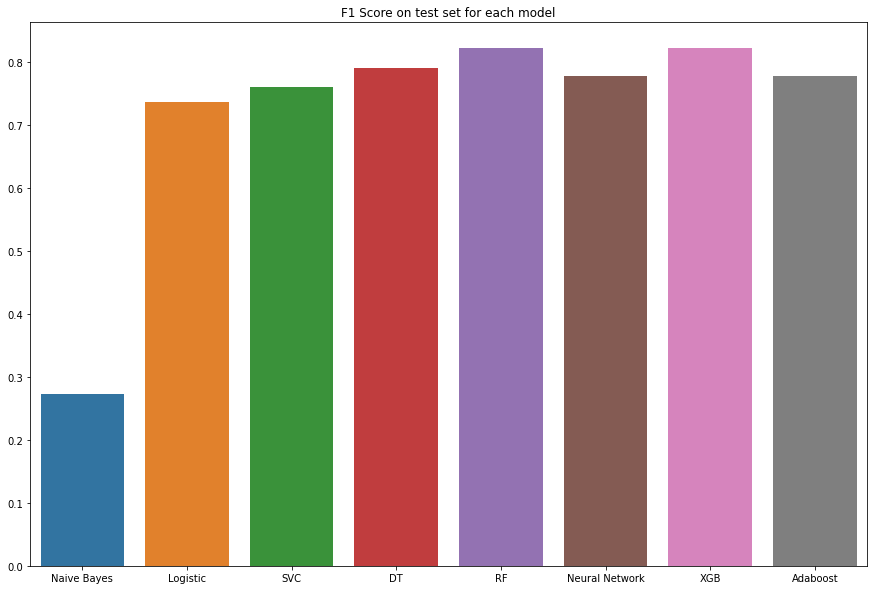

In [ ]:
plt.figure(figsize=(15,10))
plt.title("F1 Score on test set for each model")
sns.barplot(list(range(len(f1_list))), f1_list)
plt.xticks(range(len(f1_list)), labels=model_name)
plt.show()